# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#print(query_url)

# Set up lists to hold reponse info
cities_found = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try: 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(city)
    
        print(f"Found {city}") 
    
    except(KeyError, IndexError):
        print ("Could not find a city")

Found ahipara
Found korhogo
Found taltal
Could not find a city
Found rudraprayag
Found dingle
Found sitka
Found farah
Found kawalu
Found emerald
Could not find a city
Found punta arenas
Found puerto colombia
Found vila franca do campo
Could not find a city
Found linqiong
Found yellowknife
Found albany
Found carnarvon
Found ushuaia
Found hualmay
Found atuona
Found nemuro
Found torbay
Found ribeira grande
Found salalah
Found cape town
Found chuy
Found cidreira
Could not find a city
Found vangaindrano
Found hokitika
Found jamestown
Found severo-kurilsk
Found hirara
Found castro
Found college
Found doha
Found alekseyevka
Could not find a city
Found hilo
Found ballina
Found mataura
Could not find a city
Found vaini
Found tiksi
Could not find a city
Found mar del plata
Found avera
Found nan
Found bucerias
Found saint george
Could not find a city
Found khalkhal
Found hermanus
Found havre
Found peto
Found busselton
Found hobart
Found half moon bay
Found bluff
Found kavieng
Found pevek
Found tu

Found etchoropo
Found los llanos de aridane
Found olinda
Found mukhen
Found salima
Found geraldton
Found kozelsk
Found azuaga
Found maumere
Found vyazemskiy
Found laguna
Found gazli
Found gampengrejo
Found mbanza-ngungu
Found rawson
Found touros
Found barcelos
Found killybegs
Found honningsvag
Found mocuba
Found sorong
Found dongkan
Found naron
Found arman
Could not find a city
Found noyabrsk
Found aksha
Found carballo
Found shenzhen
Found bonthe
Found tucuman
Found shirokiy
Found rudbar
Found riberalta
Found gugesti
Found ancud
Found amahai
Could not find a city
Found kurilsk
Found straumen
Found jacareacanga
Found tutoia
Found kasongo-lunda
Could not find a city
Found richards bay
Found ribas do rio pardo
Found micheweni
Found vestmannaeyjar
Found ciudad bolivar
Could not find a city
Found maragogi
Found comodoro rivadavia
Found bud
Found gravdal
Found tazovskiy
Found verkhnevilyuysk
Found oussouye
Found muana
Found sorland
Found inhambane
Found bangassou
Found dunedin
Found santa cr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame from cities with lat, Lng etc
weather_dict = {
            "City": cities_found,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            'Date': date   
                }

city_data = pd.DataFrame(weather_dict)

# Save city data into a csv file
city_data.to_csv("output_data/cities.csv", index = False)

# Print city data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ahipara,-35.1667,173.1667,68.86,84,97,15.97,NZ,1613425013
1,korhogo,9.4500,-5.6333,86.40,41,95,4.38,CI,1613425013
2,taltal,-25.4000,-70.4833,68.47,67,21,4.43,CL,1613425013
3,rudraprayag,30.2833,78.9833,52.92,49,6,4.16,IN,1613425014
4,dingle,10.9995,122.6711,74.05,89,98,6.98,PH,1613425014


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Use .loc to check "Humidity" is not > 100
city_data.loc[city_data['Humidity'] >100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.

# NOT REQUIRED

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# NOT REQUIRED

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

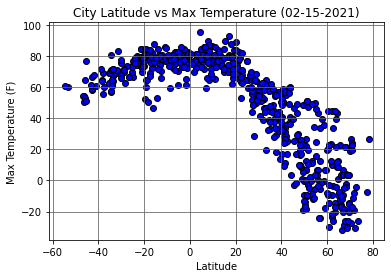

In [9]:
# Use city_data dataframe for above to generate a scatter plot 

# Create a scatter plot based on lat and max_temp
plt.scatter(x = city_data['Lat'], y = city_data['Max Temp'], edgecolors = 'black', color = 'blue')

# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data.loc[0,'Date']).strftime('%m-%d-%Y')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({weather_date})")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Display plot
plt.show()

# Plot is showing the relationship between latitude and temp

## Latitude vs. Humidity Plot

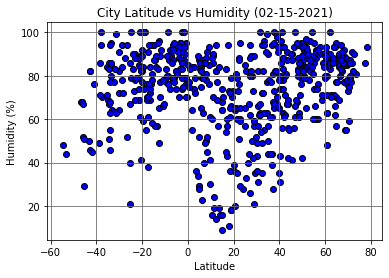

In [10]:
# Create a scatter plot based on lat and humuduty
plt.scatter(x = city_data['Lat'], y = city_data['Humidity'], edgecolors = 'black', color = 'blue')

# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data.loc[0,'Date']).strftime('%m-%d-%Y')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({weather_date})")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Display plot
plt.show()

# Plot is showing the relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

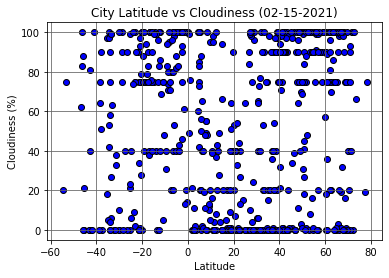

In [11]:
# Create a scatter plot based on lat and cloudiness
plt.scatter(x = city_data['Lat'], y = city_data['Cloudiness'], edgecolors = 'black', color = 'blue')

# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data.loc[0,'Date']).strftime('%m-%d-%Y')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({weather_date})")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Display plot
plt.show()

# Plot is showing the lack of relationship between latitude and cloudiness 

## Latitude vs. Wind Speed Plot

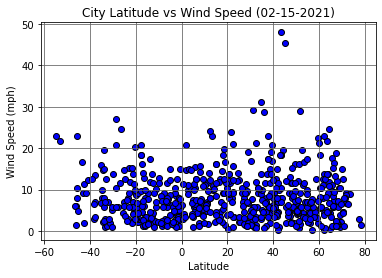

In [12]:
# Create a scatter plot based on lat and wind speed
plt.scatter(x = city_data['Lat'], y = city_data['Wind Speed'], edgecolors = 'black', color = 'blue')

# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data.loc[0,'Date']).strftime('%m-%d-%Y')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({weather_date})")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Display plot
plt.show()

# Plot is showing the lack of relationship between latitude and wind speed

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames for the regression testing below
city_data_north = city_data.loc[city_data['Lat'] > 0]
city_data_south = city_data.loc[city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8791316862577806


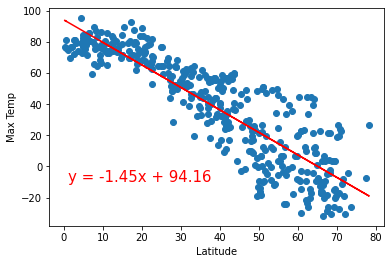

In [14]:
# Northern data fram .loc lat > 0

x_values = city_data_north['Lat']
y_values = city_data_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5750444502077564


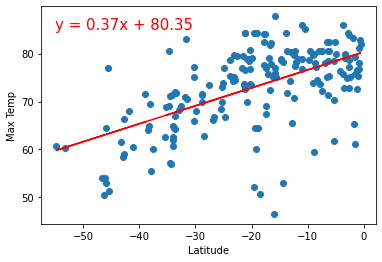

In [22]:
# Southern data frame .loc lat > 0

x_values = city_data_south['Lat']
y_values = city_data_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

# The linear regressions show the further you get from the equator the colder the temp

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39706960589583723


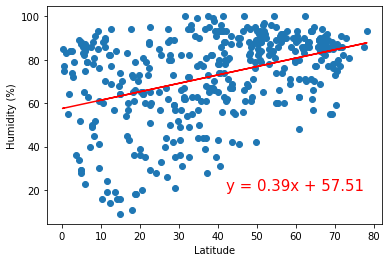

In [24]:
# Northern data fram .loc lat > 0

x_values = city_data_north['Lat']
y_values = city_data_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39342799725540634


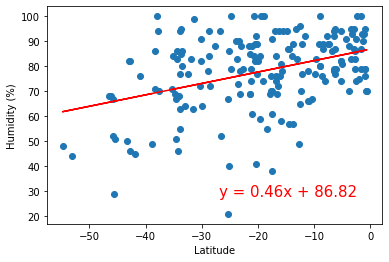

In [27]:
# Southern data frame .loc lat > 0

x_values = city_data_south['Lat']
y_values = city_data_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-27,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

# The linear regressions for the nothern hemispher shows the further away from the equator the greater chance of humid weather. 
# The southern hemispher doesnt have as strong of a relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2898223500838578


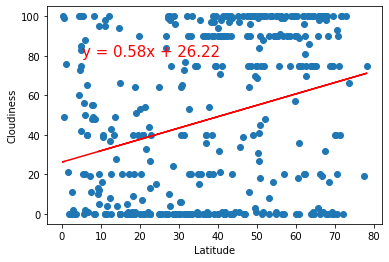

In [29]:
# Northern data fram .loc lat > 0

x_values = city_data_north['Lat']
y_values = city_data_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3476578430078082


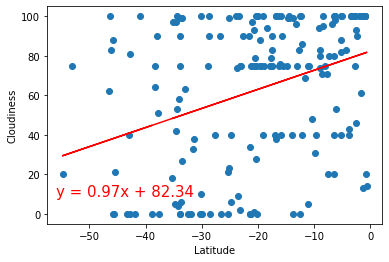

In [34]:
# Southern data frame .loc lat > 0

x_values = city_data_south['Lat']
y_values = city_data_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

# The linear regression shows little relationship between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06075858286553007


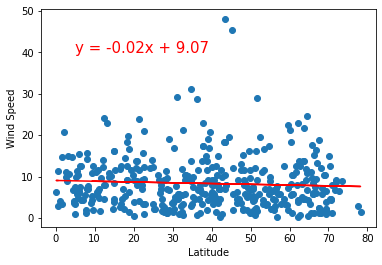

In [35]:
# Northern data fram .loc lat > 0

x_values = city_data_north['Lat']
y_values = city_data_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2744517559937986


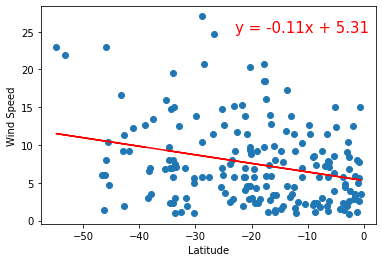

In [37]:
# Southern data frame .loc lat > 0

x_values = city_data_south['Lat']
y_values = city_data_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

# The linear regression shows little relationship between latitude and wind speed. 